In [11]:
#import folder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


spot = pd.read_csv('../Idea_data/spot_cal.csv')
future = pd.read_csv('../Idea_data/future.cal.csv')
funding = pd.read_csv('../Idea_data/funding_daily.csv')



funding

,Unnamed: 0,date,funding_mean,funding_first,funding_last,funding_std,z30_funding,z7_funding,funding_sign,sign_changed,funding_streak,daily_funding_sum,cumfund_7d,funding_extreme_pos,funding_extreme_neg
0,0,2025-05-01 00:00:00+00:00,0.000004,0.000035,-0.000080,0.000074,NaN,NaN,-1,1,1,0.000012,NaN,False,False
1,1,2025-05-02 00:00:00+00:00,-0.000101,-0.000122,-0.000087,0.000019,NaN,NaN,-1,0,2,-0.000303,NaN,False,False
2,2,2025-05-03 00:00:00+00:00,-0.000014,-0.000060,-0.000015,0.000046,NaN,NaN,-1,0,3,-0.000042,NaN,False,False
3,3,2025-05-04 00:00:00+00:00,0.000024,0.000004,0.000037,0.000018,NaN,NaN,1,1,1,0.000073,NaN,False,False
4,4,2025-05-05 00:00:00+00:00,-0.000003,-0.000024,-0.000022,0.000034,NaN,NaN,-1,1,1,-0.000010,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,118,2025-08-27 00:00:00+00:00,0.000036,0.000018,0.000035,0.000019,-1.285460,-1.676930,1,0,80,0.000108,0.001568,False,False
119,119,2025-08-28 00:00:00+00:00,0.000075,0.000053,0.000075,0.000022,0.279126,-0.120061,1,0,81,0.000225,0.001629,False,False
120,120,2025-08-29 00:00:00+00:00,0.000036,0.000043,0.000006,0.000027,-1.208070,-1.376087,1,0,82,0.000108,0.001505,False,False
121,121,2025-08-30 00:00:00+00:00,0.000078,0.000075,0.000080,0.000003,0.518610,0.408088,1,0,83,0.000235,0.001444,False,False


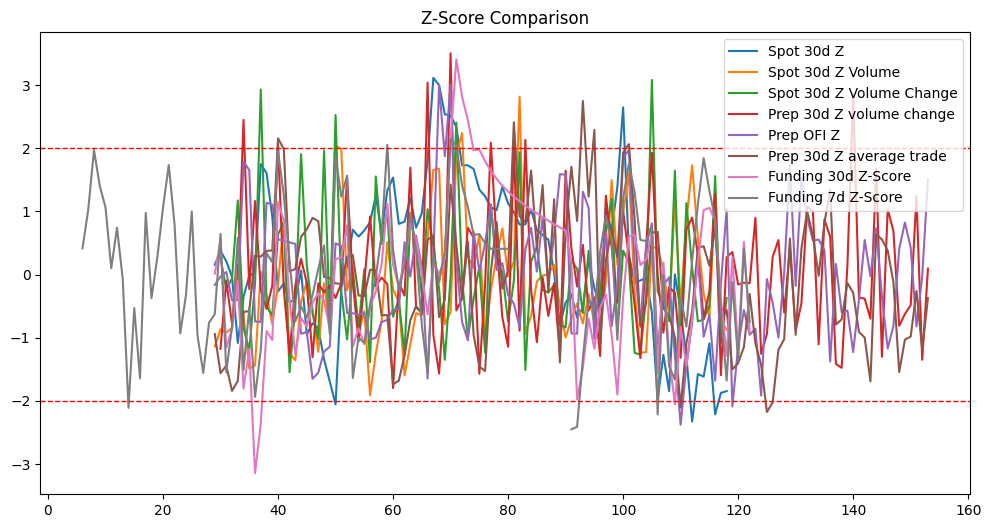

In [14]:

# example: assume your df has columns ["z_spot", "z_future", "z_funding"]
plt.figure(figsize=(12,6))

plt.plot(spot['30d_zscore'], label="Spot 30d Z")
plt.plot(spot['30d_zscore_volume'], label="Spot 30d Z Volume")
plt.plot(spot['30d_zscore_volume_change'], label="Spot 30d Z Volume Change")


plt.plot(future['z_prep_30d_volume_change'], label="Prep 30d Z volume change")
plt.plot(future['z_prep_OFI'], label="Prep OFI Z")
plt.plot(future['z_prep_30d_average_trade_inU'], label="Prep 30d Z average trade")


plt.plot(funding['z30_funding'], label="Funding 30d Z-Score")
plt.plot(funding['z7_funding'], label="Funding 7d Z-Score")

# highlight extreme threshold lines
plt.axhline(2, color='red', linestyle='--', linewidth=1)
plt.axhline(-2, color='red', linestyle='--', linewidth=1)

plt.legend()
plt.title("Z-Score Comparison")
plt.show()

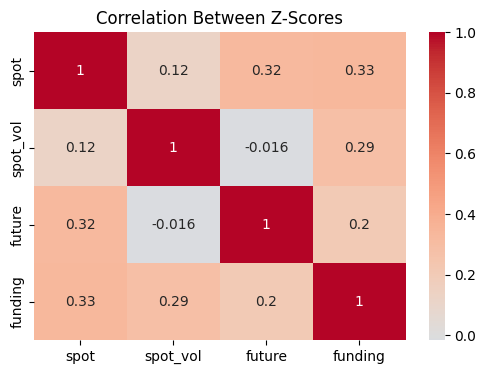

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

z_df = pd.DataFrame({
    "spot": spot["30d_zscore"],
    "spot_vol": spot["30d_zscore_volume"],
    "future": future["z_prep_OFI"],
    "funding": funding["z30_funding"],
})

plt.figure(figsize=(6,4))
sns.heatmap(z_df.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Z-Scores")
plt.show()


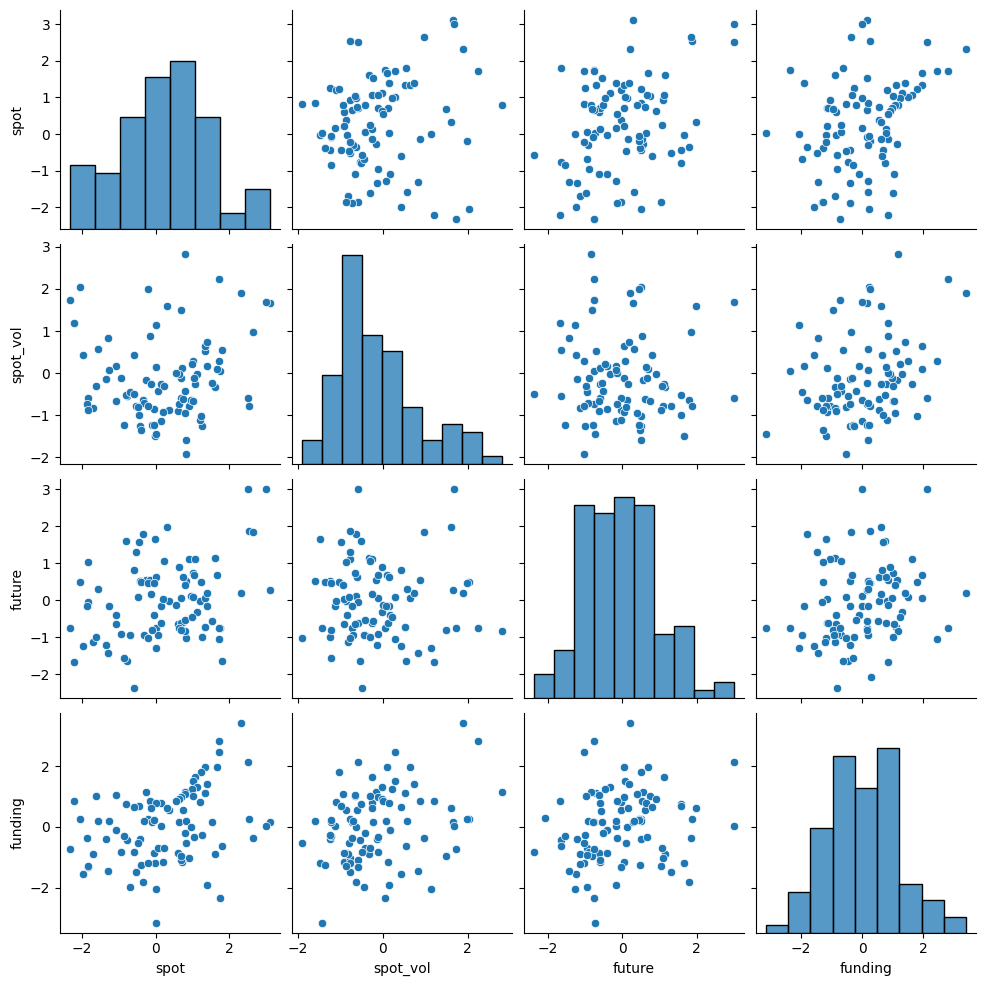

In [21]:
sns.pairplot(z_df)
plt.show()

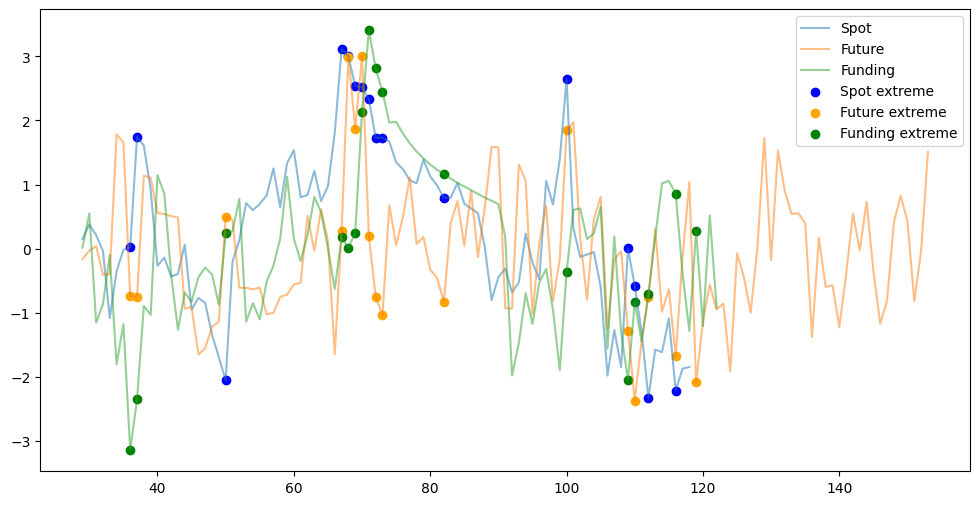

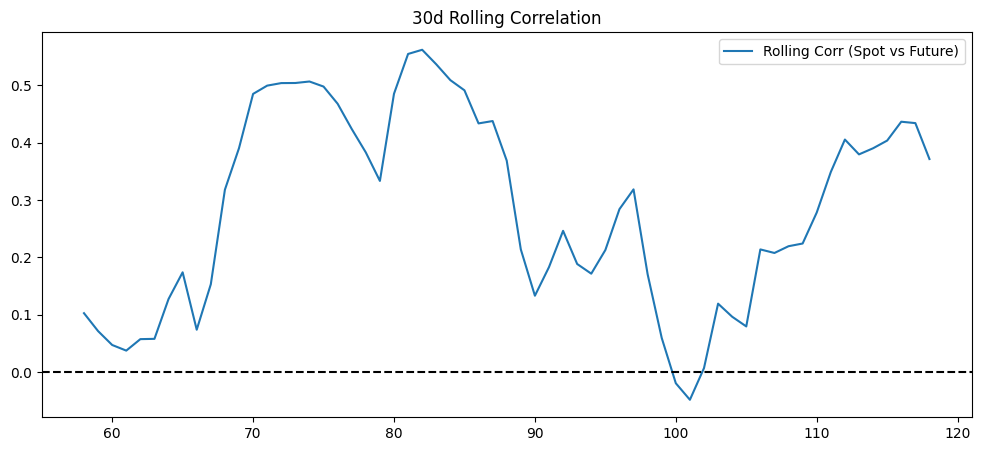

In [23]:
extremes = z_df[(z_df.abs() > 2).any(axis=1)]

plt.figure(figsize=(12,6))
plt.plot(z_df["spot"], label="Spot", alpha=0.5)
plt.plot(z_df["future"], label="Future", alpha=0.5)
plt.plot(z_df["funding"], label="Funding", alpha=0.5)
plt.scatter(extremes.index, extremes["spot"], color="blue", label="Spot extreme")
plt.scatter(extremes.index, extremes["future"], color="orange", label="Future extreme")
plt.scatter(extremes.index, extremes["funding"], color="green", label="Funding extreme")
plt.legend()
plt.show()


roll_corr = z_df["spot"].rolling(30).corr(z_df["future"])

plt.figure(figsize=(12,5))
plt.plot(roll_corr, label="Rolling Corr (Spot vs Future)")
plt.axhline(0, color="black", linestyle="--")
plt.legend()
plt.title("30d Rolling Correlation")
plt.show()

In [ ]:
# Assume you already have a dataframe df with columns:
# df['spot_z'], df['future_z'], df['funding_z']

# Set threshold
threshold = 2

# Condition: any z-score beyond +/-2
df['extreme'] = (
    (df['spot_z'].abs() > threshold) &
    (df['future_z'].abs() > threshold) &
    (df['funding_z'].abs() > threshold)
)

# Filter only extreme rows
extreme_days = df[df['extreme']]
print(extreme_days[['spot_z', 'future_z', 'funding_z']])

In [ ]:
#data checking
display(spot.describe())



# example: assume your df has columns ["z_spot", "z_future", "z_funding"]
plt.figure(figsize=(12,6))

plt.plot(spot[''], label="Spot Z-Score")
plt.plot(future['zscore'], label="Future Z-Score")
plt.plot(funding['zscore'], label="Funding Z-Score")

# highlight extreme threshold lines
plt.axhline(2, color='red', linestyle='--', linewidth=1)
plt.axhline(-2, color='red', linestyle='--', linewidth=1)

plt.legend()
plt.title("Z-Score Comparison")
plt.show()


In [ ]:

# showing extreme value for zscore 

#7d zscore
plt.figure(figsize=(12,6))
plt.plot(df["open_time"], df["7d_zscore"], label="7d-Z-score")
plt.axhline(2, color="red", linestyle="--", label="+2 threshold")
plt.axhline(-2, color="green", linestyle="--", label="-2 threshold")
plt.legend()
plt.show()


#30d zscore
plt.figure(figsize=(12,6))
plt.plot(df["open_time"], df["30d_zscore"], label="30-Z-score")
plt.axhline(2, color="red", linestyle="--", label="+2 threshold")
plt.axhline(-2, color="green", linestyle="--", label="-2 threshold")
plt.legend()
plt.show()


#7d zscore volume change
plt.figure(figsize=(12,6))
plt.plot(df["open_time"], df["7d_zscore_volume_change"], label="7d-zscore-volume-change")
plt.axhline(2, color="red", linestyle="--", label="+2 threshold")
plt.axhline(-2, color="green", linestyle="--", label="-2 threshold")
plt.legend()
plt.show()


#30d zscore volume change
plt.figure(figsize=(12,6))
plt.plot(df["open_time"], df["30d_zscore_volume_change"], label="30d-zscore-volume-change")
plt.axhline(2, color="red", linestyle="--", label="+2 threshold")
plt.axhline(-2, color="green", linestyle="--", label="-2 threshold")
plt.legend()
plt.show()


#30d log reutrn zscore
plt.figure(figsize=(12,6))
plt.plot(df["open_time"], df["30d_zscore_logreturn"], label="30d-zscore-logreturn")
plt.axhline(2, color="red", linestyle="--", label="+2 threshold")
plt.axhline(-2, color="green", linestyle="--", label="-2 threshold")
plt.legend()
plt.show()


#30d normal reutrn
plt.figure(figsize=(12,6))
plt.plot(df["open_time"], df["30d_zscore_return"], label="30d-zscore-return")
plt.axhline(2, color="red", linestyle="--", label="+2 threshold")
plt.axhline(-2, color="green", linestyle="--", label="-2 threshold")
plt.legend()
plt.show()


In [ ]:
#identify outlier
outliers = df[(df["7d_zscore"] > 2) | (df["7d_zscore"] < -2)]
print(outliers[["open_time", "close", "7d_zscore"]])


outliers = df[(df["30d_zscore"] > 2) | (df["30d_zscore"] < -2)]
print(outliers[["open_time", "close", "30d_zscore"]])


#volume change
outliers = df[(df["30d_zscore_volume_change"] > 2) | (df["30d_zscore_volume_change"] < -2)]
print(outliers[["open_time", "close", "30d_zscore_volume_change"]])


#volume change
outliers = df[(df["7d_zscore_volume_change"] > 2) | (df["7d_zscore_volume_change"] < -2)]
print(outliers[["open_time", "close", "7d_zscore_volume_change"]])


#return change
outliers = df[(df["30d_zscore_return"] > 2) | (df["30d_zscore_return"] < -2)]
print(outliers[["open_time", "close", "30d_zscore_return"]])

#logreturn change
outliers = df[(df["30d_zscore_logreturn"] > 2) | (df["30d_zscore_logreturn"] < -2)]
print(outliers[["open_time", "close", "30d_zscore_return"]])


In [ ]:
import matplotlib.pyplot as plt

df["open_time"] = pd.to_datetime(df["open_time"])
df = df.sort_values("open_time")


# List of zscore columns you want to track
zscore_cols = [
    "7d_zscore",
    "30d_zscore",
    "7d_zscore_volume_change",
    "30d_zscore_volume_change",
    "30d_zscore_return",
    "30d_zscore_logreturn"
]

plt.figure(figsize=(14,6))

df = df.sort_values("open_time")
# Plot each zscore’s outliers on its own row
for i, col in enumerate(zscore_cols):
    outliers = df[(df[col] > 2) | (df[col] < -2)]
    plt.scatter(outliers["open_time"], [i]*len(outliers), label=col, marker="x")

plt.yticks(range(len(zscore_cols)), zscore_cols)  # label rows with column names
plt.title("Timeline of Outlier Events (|Z-score| > 2)")
plt.xlabel("Date")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # put legend outside
plt.show()


In [ ]:
#correlation 


corr_value = df["normal_return"].corr(df["volume_change_%"])
print("Correlation:", corr_value)



corr_value = df["log_return"].corr(df["volume_change_%"])
print("Correlation:", corr_value)


corr_value = df["30d_zscore_return"].corr(df["30d_zscore_volume_change"])
print("Correlation:", corr_value)


corr_value = df["normal_return"].corr(df["7d_rolling_volatility"])
print("Correlation:", corr_value)

corr_value = df["log_return"].corr(df["7d_rolling_volatility"])
print("Correlation:", corr_value)

corr_value = df["log_return"].corr(df["30d_rolling_volatility"])
print("Correlation:", corr_value)

corr_value = df["close"].corr(df["volume"])
print("Correlation:", corr_value)

corr_value = df["close"].corr(df["volume_change_%"])
print("Correlation:", corr_value)

#showing all column for reference
col_df = pd.DataFrame(df.columns, columns=['Column Name'])
print(col_df)


